# **1. Input Embedding**

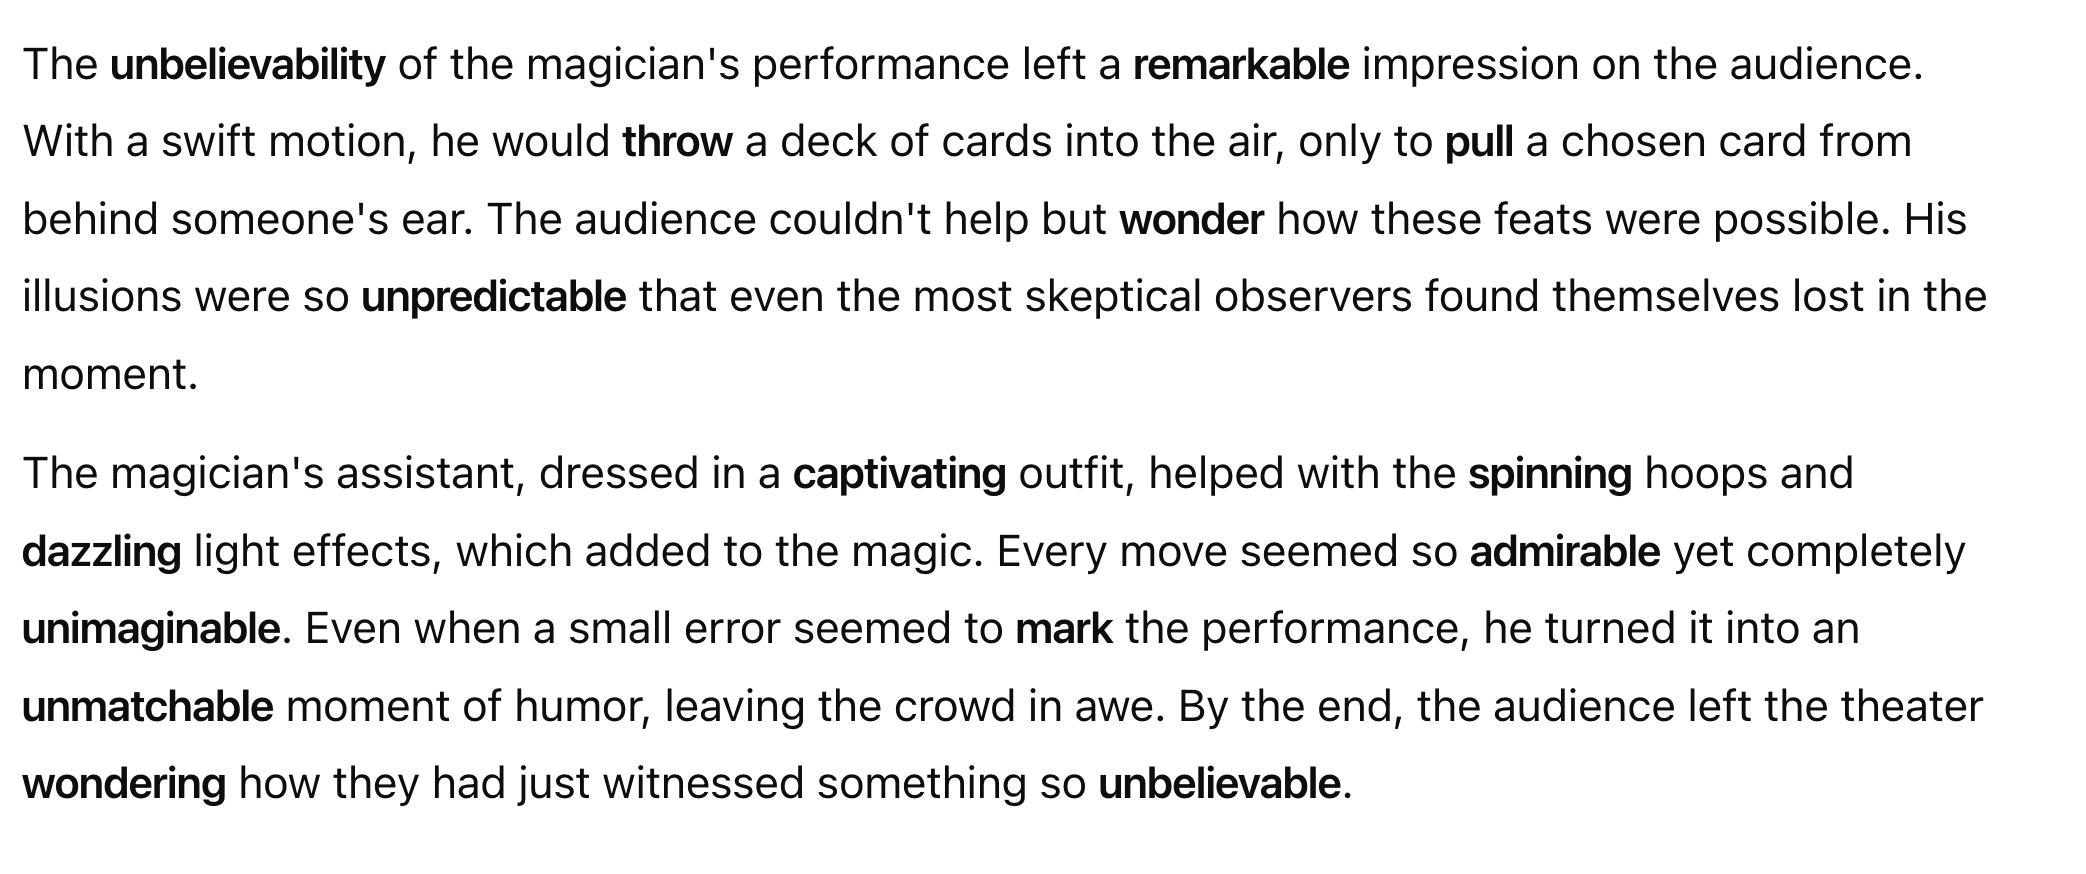

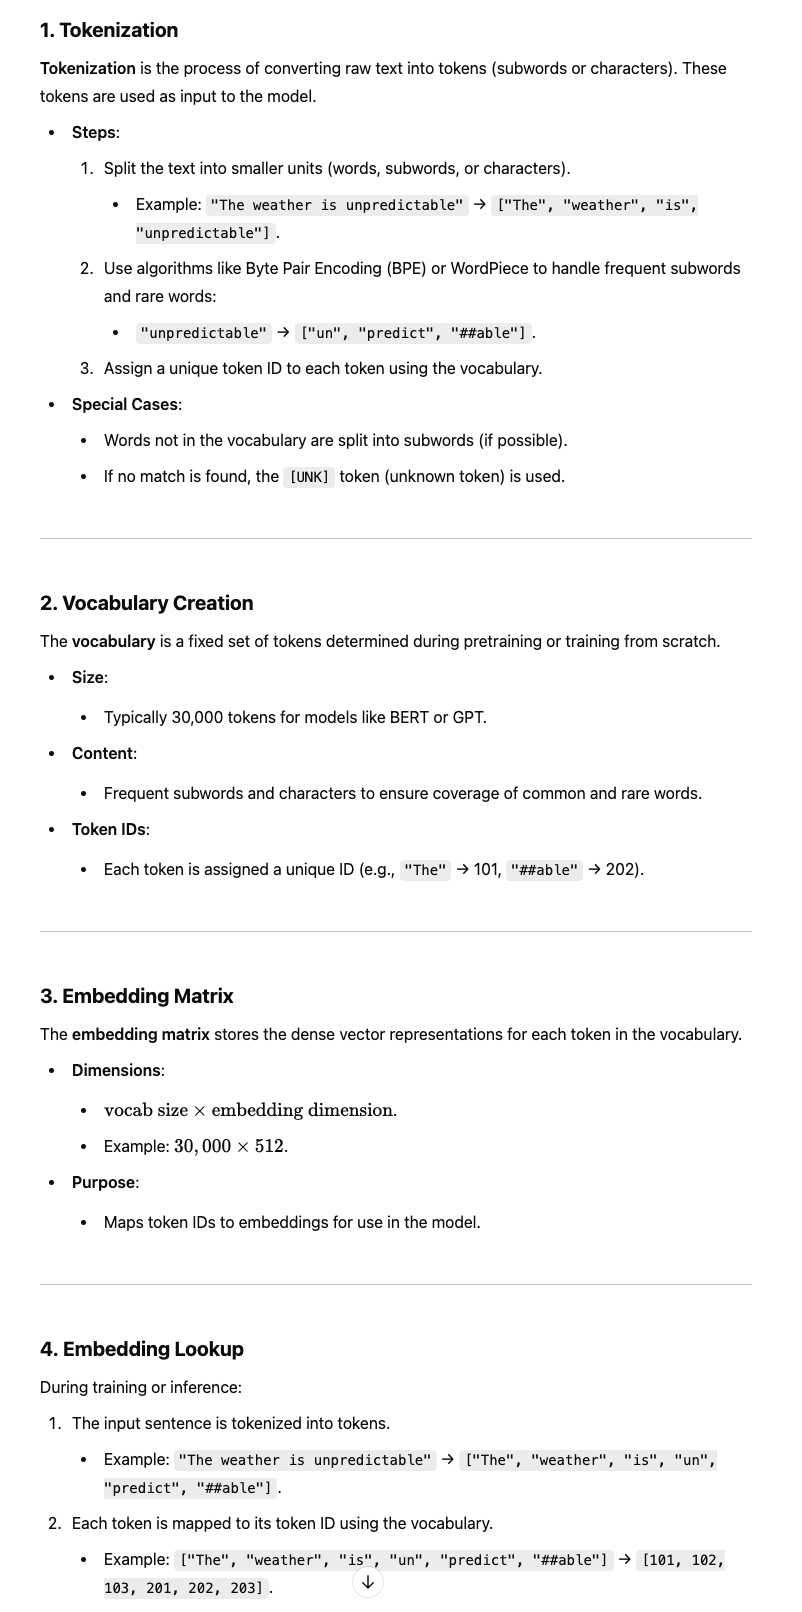

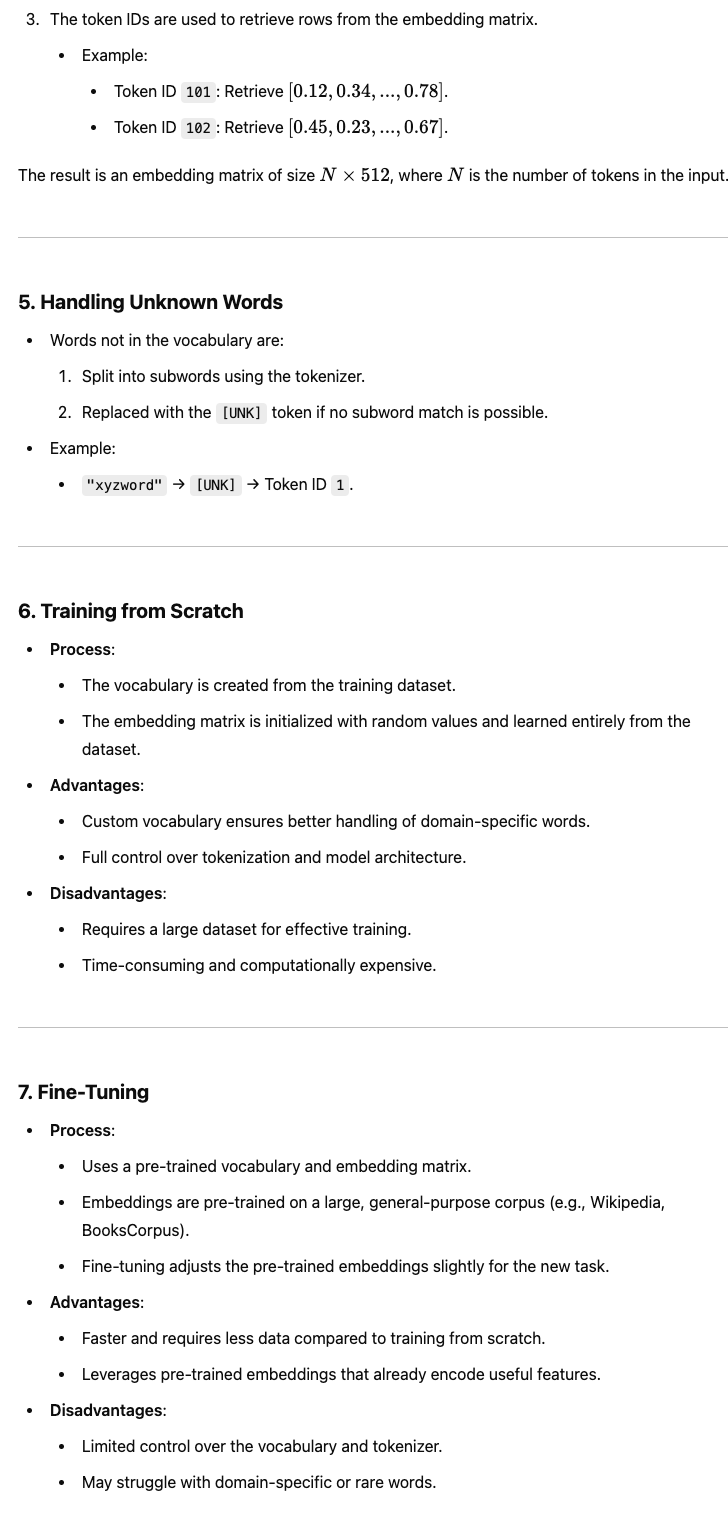

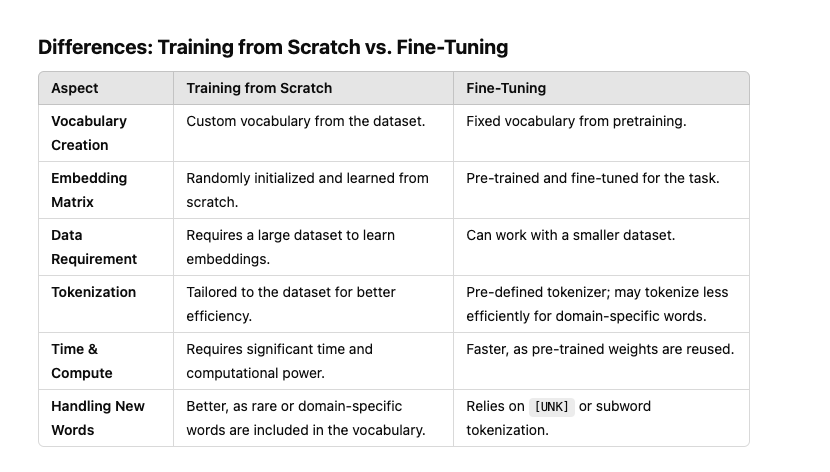

The 512-dimensional embedding is chosen as a common standard in deep learning models like Transformers (e.g., BERT) because it provides a high-dimensional space to encode rich information about words. Higher-dimensional embeddings allow the model to capture subtle relationships and distinctions between words across various linguistic features.

Here’s an example to explain why embeddings use high dimensions (e.g., 512), using 4 dissimilar words and 4-5 features:



## Why 512 dimension?
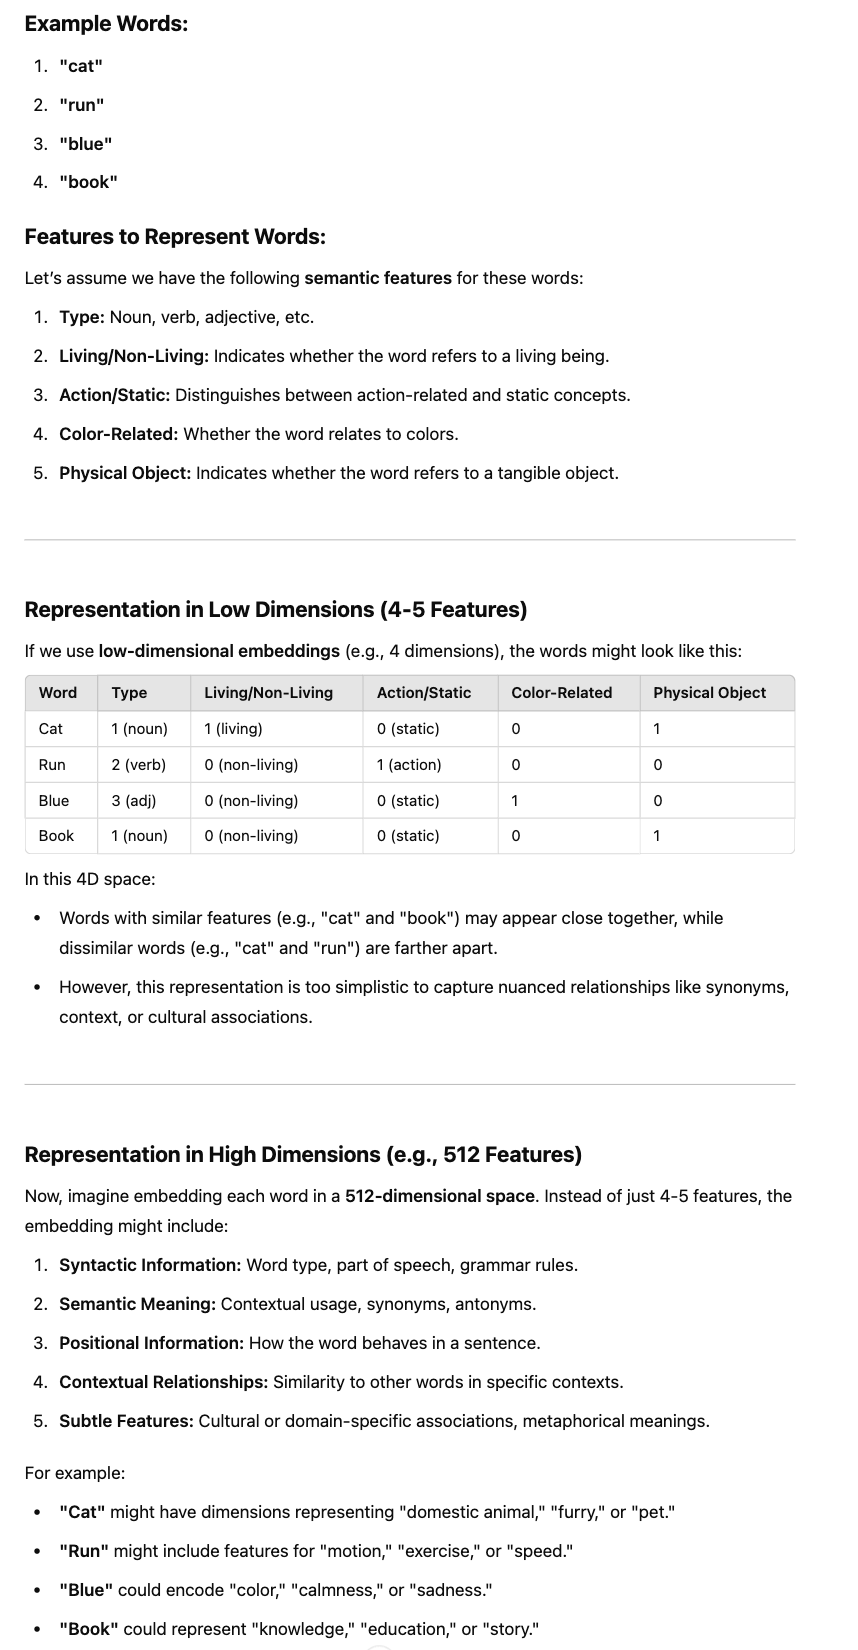

In [ ]:
import torch
import torch.nn as nn
import math

In [ ]:
import pandas as pd

# Load the dataset
file_path = "next_word_prediction_dataset.csv"
dataset = pd.read_csv(file_path)

# Display the dataset
print(dataset.head())


                Input Sentence Target Word
0           The cat sat on the         mat
1    She enjoys running in the        park
2  They are planning something         big
3      I love eating delicious        food
4       He is an unforgettable      person




    # Mixed Contexts
    # {"Input Sentence": "After withdrawing cash from the bank, they walked along the river", "Target Word": "bank"},
    # {"Input Sentence": "The bank near the river offers better", "Target Word": "services"},
    # {"Input Sentence": "She withdrew money and sat near the river", "Target Word": "bank"},
    # {"Input Sentence": "The bank was built close to the", "Target Word": "river"},
    # {"Input Sentence": "He visited the bank before heading to the river", "Target Word": "bank"},

# **Why study Transformers based architecture?**

0. Transformers are exceptional at capturing contextual meaning

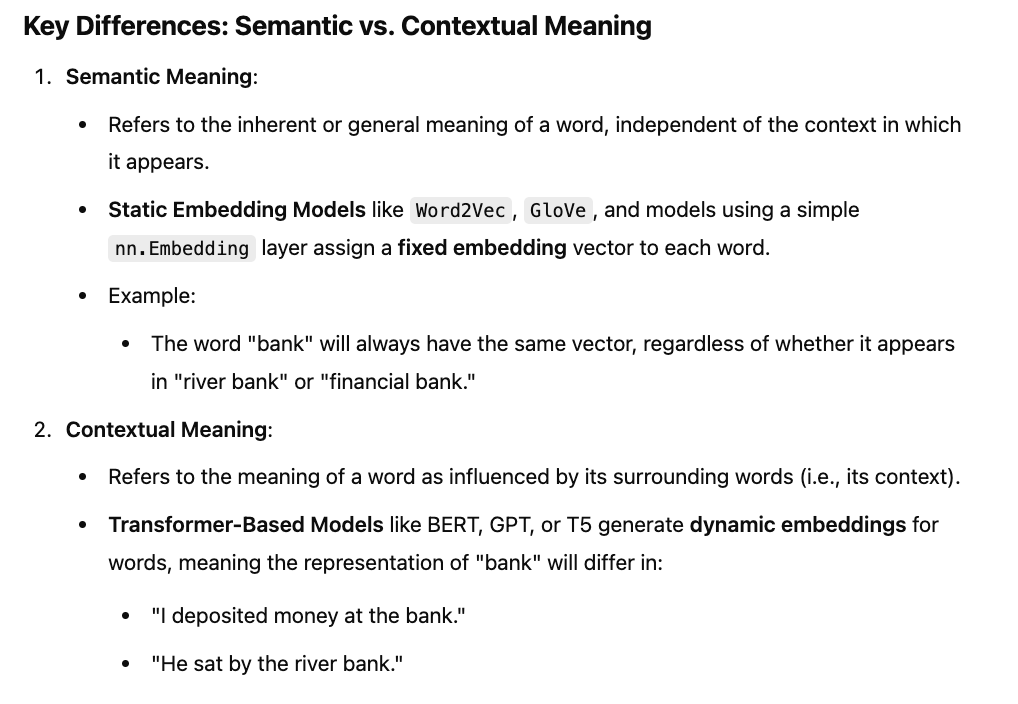

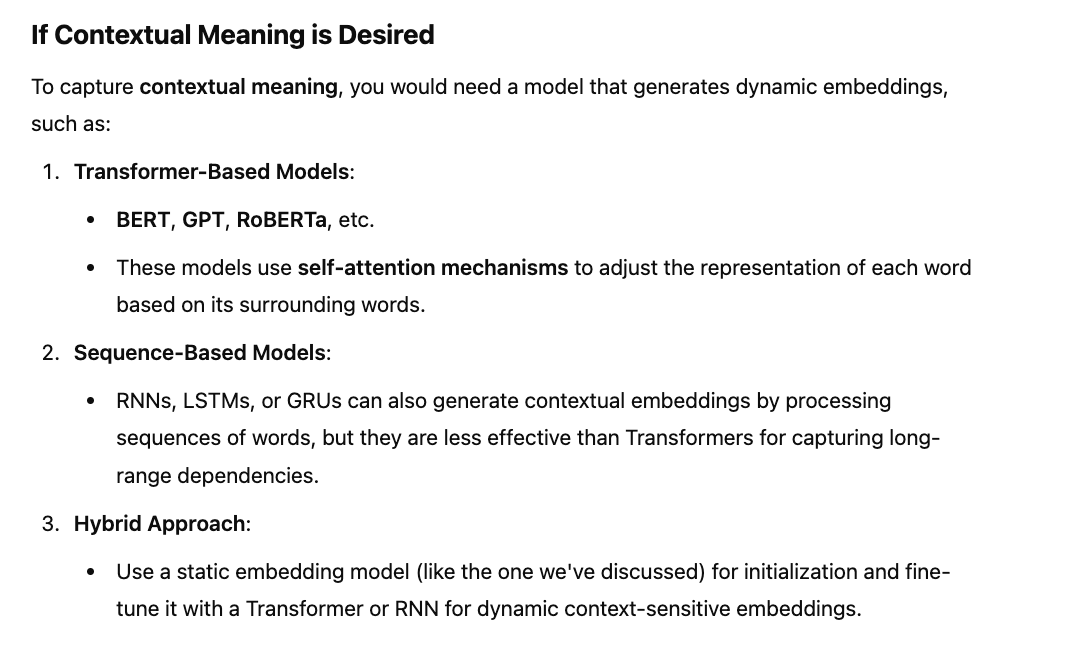

In [ ]:
# !pip show torch
# !pip show torchtext

In [ ]:
# !pip uninstall -y torch torchtext

In [ ]:
!pip install torch==2.0.0 torchtext==0.15.1 torchvision==0.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.

In [ ]:
import torch

In [ ]:
# Dataset with Input and Target Label
dataset = [
    ("I went to the bank to deposit", "money"),          # Financial context
    ("He opened a savings account at the", "bank"),      # Financial context
    ("The bank approved my loan for buying a", "house"), # Financial context
    ("The ATM outside the bank was not", "working"),     # Financial context
    ("She applied for a credit card at the", "bank"),    # Financial context
    ("The river bank was full of", "trees"),             # River context
    ("He sat by the river bank and enjoyed the", "view"),# River context
    ("The river flowed gently past the", "bank"),        # River context
]

#1. **Vocab creation** (Frequency count)
- basic_english tokenizer from torchtext:  split sentences into lowercase words and removes simple punctuation.
- building vocab using Counter (from collections import Counter
 ) object, which counts the frequency of each token in the dataset.

In [ ]:
from torchtext.data.utils import get_tokenizer
from collections import Counter
tokenizer= get_tokenizer("basic_english")

vocab_count = Counter()

for sen, label in dataset:
  vocab_count.update(tokenizer(sen))
  vocab_count.update([label])

print(vocab_count)
print(len(vocab_count))

Counter({'the': 11, 'bank': 8, 'a': 3, 'river': 3, 'to': 2, 'he': 2, 'at': 2, 'for': 2, 'was': 2, 'i': 1, 'went': 1, 'deposit': 1, 'money': 1, 'opened': 1, 'savings': 1, 'account': 1, 'approved': 1, 'my': 1, 'loan': 1, 'buying': 1, 'house': 1, 'atm': 1, 'outside': 1, 'not': 1, 'working': 1, 'she': 1, 'applied': 1, 'credit': 1, 'card': 1, 'full': 1, 'of': 1, 'trees': 1, 'sat': 1, 'by': 1, 'and': 1, 'enjoyed': 1, 'view': 1, 'flowed': 1, 'gently': 1, 'past': 1})
40


In [ ]:
# Tokenizer
from torchtext.data.utils import get_tokenizer
from collections import Counter

tokenizer = get_tokenizer("basic_english")
vocab_counter = Counter()

for sen, label in dataset:
    vocab_counter.update(tokenizer(sen))  # Tokenize input sentence
    vocab_counter.update([label])        # Add target label

# Print Vocabulary Counter and Size
print("Vocabulary Counter:", vocab_counter)
print("Vocabulary Size:", len(vocab_counter))

Vocabulary Counter: Counter({'the': 11, 'bank': 8, 'a': 3, 'river': 3, 'to': 2, 'he': 2, 'at': 2, 'for': 2, 'was': 2, 'i': 1, 'went': 1, 'deposit': 1, 'money': 1, 'opened': 1, 'savings': 1, 'account': 1, 'approved': 1, 'my': 1, 'loan': 1, 'buying': 1, 'house': 1, 'atm': 1, 'outside': 1, 'not': 1, 'working': 1, 'she': 1, 'applied': 1, 'credit': 1, 'card': 1, 'full': 1, 'of': 1, 'trees': 1, 'sat': 1, 'by': 1, 'and': 1, 'enjoyed': 1, 'view': 1, 'flowed': 1, 'gently': 1, 'past': 1})
Vocabulary Size: 40


## **Add special tokens to the vocab**
 - special_tokens: list of special tokens that will be included in the vocabulary. The "<unk>" token stands for "unknown" and is typically used as a placeholder for any word not found in the vocabulary.
 - from torchtext.vocab import vocab</br>
vocab(counter, specials=special_tokens)</br>
This ensures that the special tokens like "<unk>" are included in the vocabulary, regardless of whether they appear in the counter.
 - vocab_instance.set_default_index(vocab_instance["<unk>"])</br>
Set default index for unknown tokens

In [ ]:
# Create Vocab Object
from torchtext.vocab import vocab

vocab_index = vocab(vocab_counter, specials=['<UNK>'])

# Set Default Index for Unknown Tokens
# Setting the default index ensures that when an unknown token is encountered, it automatically maps to the index of
#  <unk> rather than raising an error.
vocab_index.set_default_index(vocab_index["<UNK>"])

# Print Total Vocabulary Size
print("Total Vocabulary Size:", len(vocab_index))

Total Vocabulary Size: 41


In [ ]:
print(vocab_count)

Counter({'the': 11, 'bank': 8, 'a': 3, 'river': 3, 'to': 2, 'he': 2, 'at': 2, 'for': 2, 'was': 2, 'i': 1, 'went': 1, 'deposit': 1, 'money': 1, 'opened': 1, 'savings': 1, 'account': 1, 'approved': 1, 'my': 1, 'loan': 1, 'buying': 1, 'house': 1, 'atm': 1, 'outside': 1, 'not': 1, 'working': 1, 'she': 1, 'applied': 1, 'credit': 1, 'card': 1, 'full': 1, 'of': 1, 'trees': 1, 'sat': 1, 'by': 1, 'and': 1, 'enjoyed': 1, 'view': 1, 'flowed': 1, 'gently': 1, 'past': 1})


In [ ]:
from torchtext.vocab import vocab
vocab_index= vocab(vocab_count, specials = ['<UNK>'])
vocab_index.set_default_index(vocab_index['<UNK>'])
print(len(vocab_index))
vocab_index.get_stoi()

41


{'gently': 39,
 'past': 40,
 'flowed': 38,
 'enjoyed': 36,
 'and': 35,
 'sat': 33,
 'full': 30,
 'river': 29,
 'account': 12,
 'savings': 11,
 'working': 24,
 'applied': 26,
 'he': 8,
 'to': 3,
 'money': 7,
 'view': 37,
 'trees': 32,
 'loan': 16,
 'card': 28,
 'deposit': 6,
 'bank': 5,
 'the': 4,
 'by': 34,
 'a': 10,
 'went': 2,
 'i': 1,
 'for': 17,
 'not': 23,
 '<UNK>': 0,
 'approved': 14,
 'at': 13,
 'my': 15,
 'of': 31,
 'buying': 18,
 'house': 19,
 'atm': 20,
 'outside': 21,
 'she': 25,
 'was': 22,
 'opened': 9,
 'credit': 27}

# **2. Data Preprocessing**

Process the input data, tokenize them and labels and assign token IDs

In [ ]:
# def preprocess_data(data):
#     sen, label = data
#     tokens= [vocab_index[token] for token in tokenizer(sen)]
#     label =vocab_index[label]
#     return tokens, label
# processed_dataset= [preprocess_data(data) for data in dataset]
# processed_dataset

In [ ]:
dataset

[('I went to the bank to deposit', 'money'),
 ('He opened a savings account at the', 'bank'),
 ('The bank approved my loan for buying a', 'house'),
 ('The ATM outside the bank was not', 'working'),
 ('She applied for a credit card at the', 'bank'),
 ('The river bank was full of', 'trees'),
 ('He sat by the river bank and enjoyed the', 'view'),
 ('The river flowed gently past the', 'bank')]

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch

class CustomDataset(Dataset):

  def __init__(self, raw_dataset):
    self.raw_dataset= raw_dataset

  def __len__(self):
    return len(self.raw_dataset)

  def __getitem__(self, index):
    sen, label = self.raw_dataset[index]
    tokens= [vocab_index[token] for token in tokenizer(sen)]
    label =vocab_index[label]
    return torch.tensor(tokens), torch.tensor(label)

def process_batch(batch):
   inputs, label = zip(*batch)
   inputs= [torch.tensor(i) for i in inputs]
   padded_inputs=pad_sequence(inputs, padding_value = 0, batch_first= True)
   torch.tensor(label)
   return padded_inputs, label

custom_dataset = CustomDataset(dataset)

data= DataLoader(custom_dataset, batch_size = 2, shuffle = True, collate_fn= process_batch)

In [ ]:
for i, (input, label) in enumerate(data):
  print(i+1)
  print(input, label)

1
tensor([[ 4, 29, 38, 39, 40,  4,  0,  0],
        [ 4,  5, 14, 15, 16, 17, 18, 10]]) (tensor(5), tensor(19))
2
tensor([[25, 26, 17, 10, 27, 28, 13,  4,  0],
        [ 8, 33, 34,  4, 29,  5, 35, 36,  4]]) (tensor(5), tensor(37))
3
tensor([[ 4, 29,  5, 22, 30, 31,  0],
        [ 4, 20, 21,  4,  5, 22, 23]]) (tensor(32), tensor(24))
4
tensor([[ 8,  9, 10, 11, 12, 13,  4],
        [ 1,  2,  3,  4,  5,  3,  6]]) (tensor(5), tensor(7))


<ipython-input-31-f4d866c97c49>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs= [torch.tensor(i) for i in inputs]


#**3. Data Preparation (Batch Creation)**

##**why divide data into random batches**
Randomizing batches during training ensures:

  - Better generalization.
  - Faster and more stable convergence.
  - Prevention of overfitting to specific data sequences.
  - Scalability for large datasets.

batch_first? </br>In pad_sequence, the default behavior is batch_first=False, which means the output tensor has the shape (seq_len, batch_size). However, depending on the expected structure of your model, you might expect the output tensor to have the shape (batch_size, seq_len).

(batch_size, max_seq_len, feature_dim) (for 3D tensors, if applicable).
Many PyTorch models (e.g., RNNs, LSTMs, GRUs, and Transformers) expect input tensors with the shape (batch_size, seq_len, feature_dim) when batch_first=True.

padding? </br>Sequences are padded to the length of the longest sequence in the batch.

##**why NextWordDataset class is used here**

PyTorch’s DataLoader expects a dataset object that implements the __len__ and __getitem__ methods.

With the NextWordDataset class:
__len__ tells DataLoader how many samples are in the dataset.

__getitem__ ensures that each sample (or data point) is fetched in a consistent format.

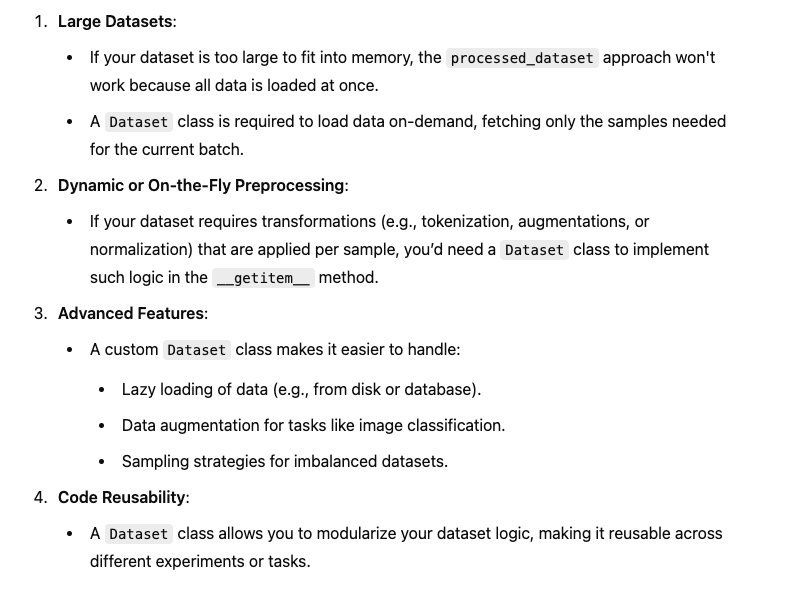

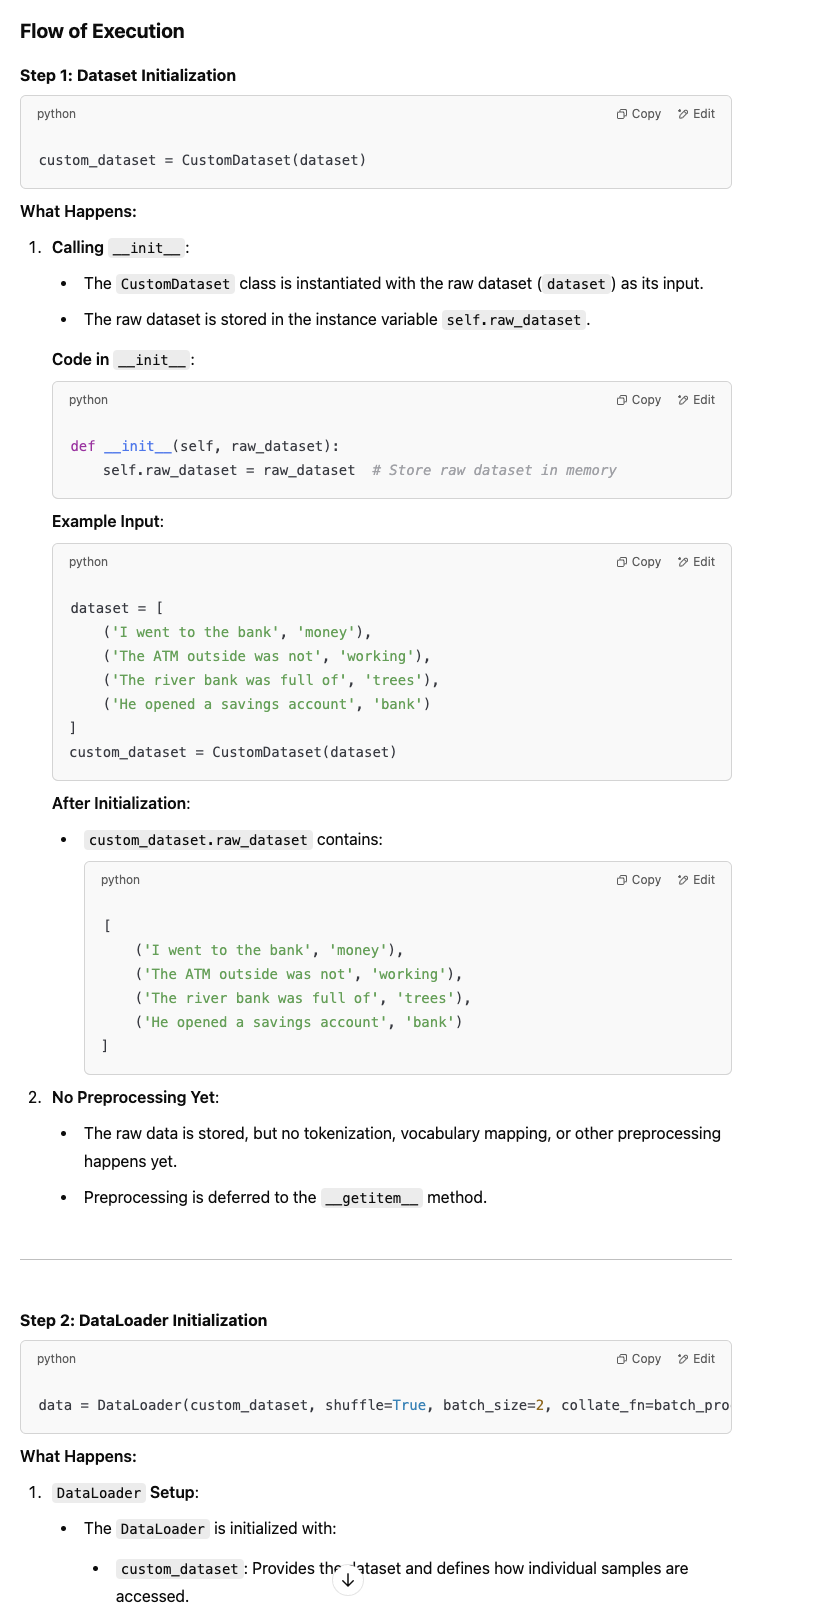

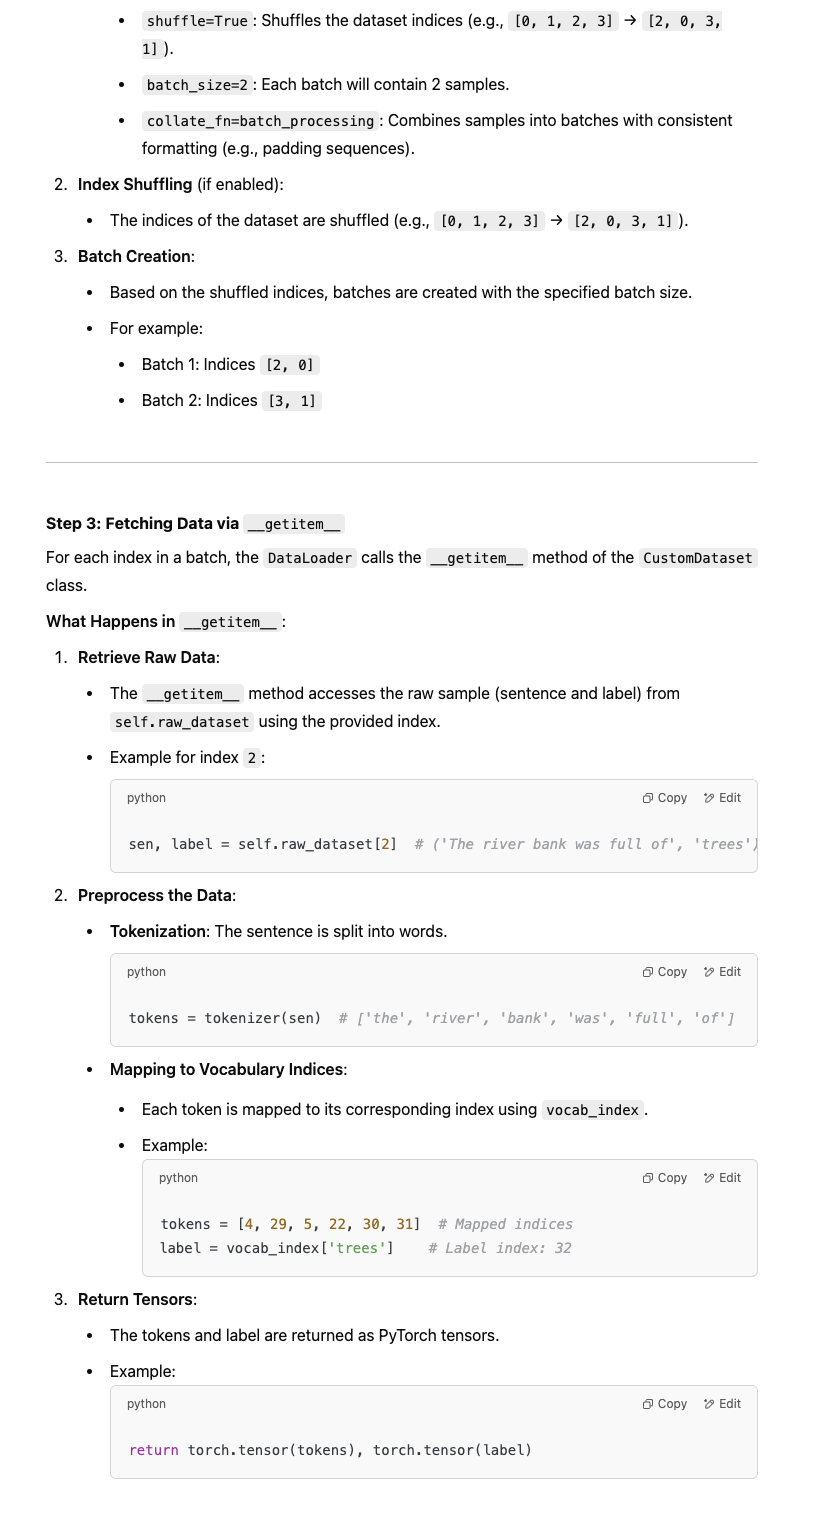

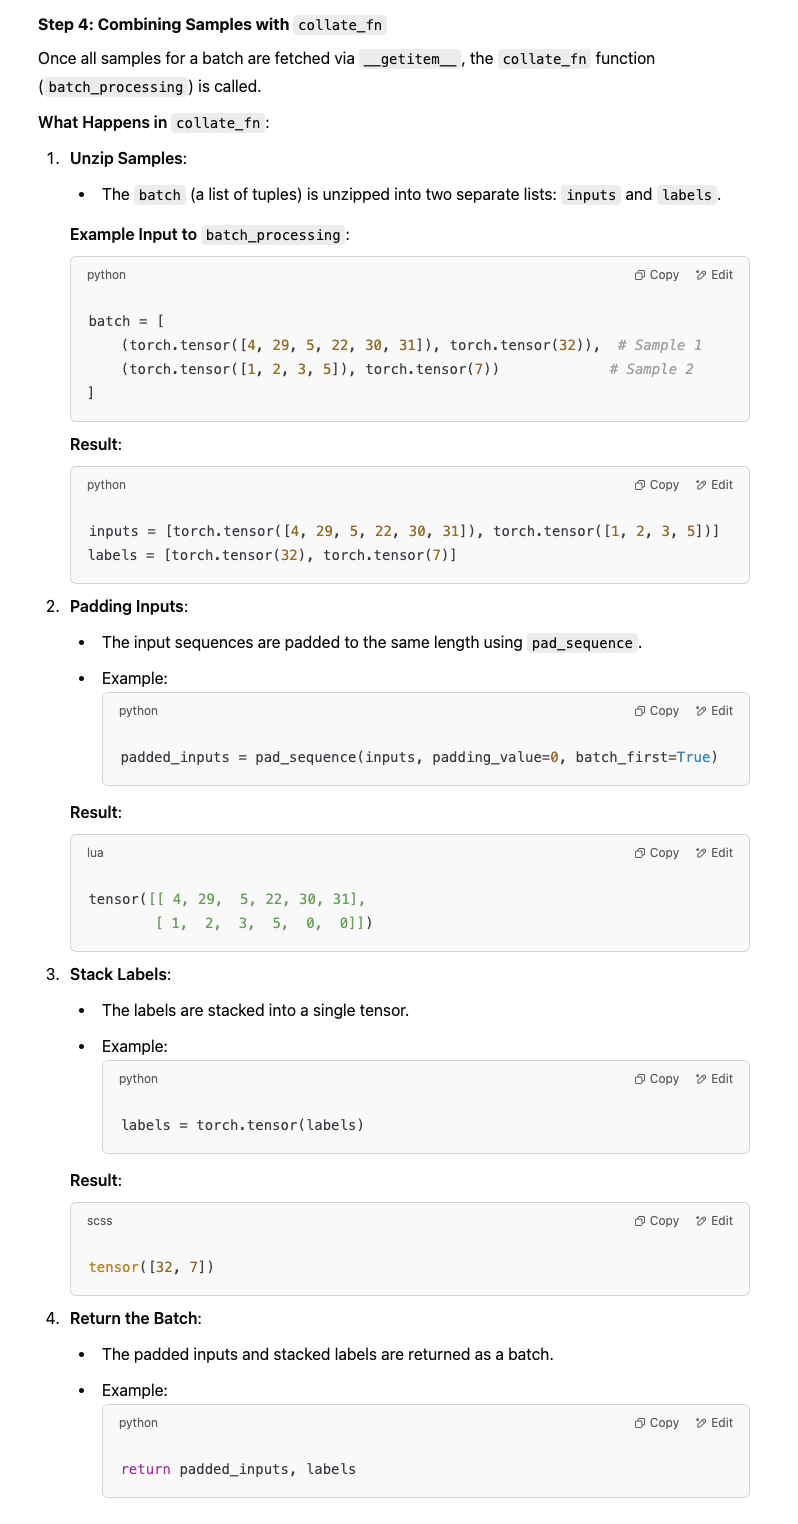

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

class CustomDataset(Dataset):
  def __init__(self, raw_dataset):
    self.raw_dataset= raw_dataset

  def __len__(self):
    return len(self.raw_dataset)

  def __getitem__(self, index):
    sen, label = self.raw_dataset[index]
    tokens= [vocab_index[token] for token in tokenizer(sen)]
    label =vocab_index[label]

    return torch.tensor(tokens), torch.tensor(label)


def batch_processing(batch):
  inputs, labels= zip(*batch)

  inputs =[torch.tensor(i) for i in inputs]
  padded_inputs = pad_sequence(inputs, padding_value= 0, batch_first = True)

  labels= torch.tensor(labels)
  return padded_inputs, labels

custom_dataset= CustomDataset(dataset)

data = DataLoader(custom_dataset, shuffle= True, batch_size= 2, collate_fn = batch_processing)